In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?',
    'Time Encoding',
    'Approx Error "Size" (for figures only)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

# drop nan time encoding
approximation_algorithms = approximation_algorithms[approximation_algorithms['Time Encoding'].notnull()]


# remove question marks from time encoding
approximation_algorithms['Time Encoding'] = approximation_algorithms['Time Encoding'].astype(str).str.replace('?', '')
approximation_algorithms['Time Encoding'].value_counts()



Time Encoding
10.0      80
20.0      46
400.0     32
11.0      26
21.0      19
16.0       9
15.0       9
16.24      8
500.0      8
25.0       8
15.015     8
25.02      6
30.0       6
40.0       5
15.41      3
16.1       3
26.5       2
31.0       2
6.0        2
12.0       2
12.1       2
600.0      2
16.5       1
1010.0     1
60.0       1
984.0      1
15.019     1
26.65      1
22.0       1
25.5       1
13.0       1
16.2       1
6.1        1
16.4       1
1045.0     1
6.6        1
15.26      1
15.25      1
25.51      1
25.2       1
26.55      1
21.5       1
25.3       1
27.0       1
15.097     1
41.0       1
Name: count, dtype: int64

In [3]:
# read sheet1
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?',
    'Time Encoding',

]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']
sheet1 = sheet1[sheet1['Approximate?'] != 1]


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(
    r'(\d+\.?\d*)')[0].astype(float)


sheet1['Approx Error "Size" (for figures only)'] = '0'

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(
    approximation_algorithms['Family Name'])]

# drop NaN time encoding
sheet1 = sheet1[sheet1['Time Encoding'].notnull()]

sheet1['Time Encoding'].value_counts()


Time Encoding
20         37
11         29
16         17
10         10
30          9
986         7
1000        6
1045        5
10.1        4
15.25       3
1010        3
26.5        2
15.109      2
1020        2
16.1        2
2000        2
21          2
12          2
28.5        1
29.4        1
15.097      1
15.614      1
15.41       1
9000        1
26.1        1
1984        1
960         1
11.585      1
11.1        1
944         1
9122        1
1515        1
52          1
29.2        1
10.0005     1
40          1
11.3        1
16.2        1
15.5        1
15.47       1
15.26       1
15.24       1
15.23       1
15.107      1
15.103      1
15.101      1
988.1       1
15.4        1
988.2       1
15.95       1
16.9        1
942         1
41.1        1
Name: count, dtype: int64

In [4]:
# convert time encoding into a function name following this example: 10 -> comp_fn_10_0000 , 10.5 -> comp_fn_10_5000
def encode_time_to_function_name(time_str):
    # Split on the decimal point
    parts = time_str.split('.')
    integer_part = int(parts[0])
    decimal_part = 0
    if len(parts) > 1:
        decimal_fraction = parts[1] + "0000" 
        decimal_part = int(decimal_fraction[:4])  

    function_name = f"comp_fn_{integer_part:d}_{decimal_part:04d}"
    return function_name

sheet1['Time Encoding Function'] = sheet1['Time Encoding'].apply(encode_time_to_function_name)
approximation_algorithms['Time Encoding Function'] = approximation_algorithms['Time Encoding'].apply(encode_time_to_function_name)

In [5]:
encode_time_to_function_name('6.6')

'comp_fn_6_6000'

In [6]:
import inspect
from complexity_functions import complexity_functions

elements = inspect.getmembers(complexity_functions, inspect.isfunction)
elements_dict = dict(elements)

# check if all time encoding functions are in the complexity_functions module
for time_encoding in sheet1['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(sheet1[sheet1['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


for time_encoding in approximation_algorithms['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(approximation_algorithms[approximation_algorithms['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


In [7]:
sheet1['n = 10^3'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
sheet1['n = 10^6'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
sheet1['n = 10^9'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))

approximation_algorithms['n = 10^3'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
approximation_algorithms['n = 10^6'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
approximation_algorithms['n = 10^9'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))



In [8]:
# list families that are in both datasets
sheet1_families = sheet1['Family Name'].unique()
approximation_families = approximation_algorithms['Family Name'].unique()

common_families = np.intersect1d(sheet1_families, approximation_families)
len(common_families)

approximation_algorithms['Approx Error "Size" (for figures only)'].value_counts()


Approx Error "Size" (for figures only)
1.0    151
2.0     69
4.0     37
2.4     31
2.6     24
Name: count, dtype: int64

In [9]:
# list families that are in approxmaiton_families but not in sheet1_families
missing_families = np.setdiff1d(approximation_families, sheet1_families)
missing_families

array(['Convex Optimization (Non-linear)', 'Root Computation',
       'Wiener Index'], dtype=object)

In [10]:
approximation_families

array(['Sorting', 'Matrix Chain Multiplication', 'Maximum Flow',
       'Matrix Product', 'Linear System', 'Minimum Spanning Tree (MST)',
       'Closest Pair Problem', 'All-Pairs Shortest Paths (APSP)',
       'LU Decomposition', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Convex Optimization (Non-linear)',
       'Optimal Binary Search Trees', 'Nash Equilibria',
       'Maximum-Weight Matching', 'Discrete Fourier Transform',
       'Eigenvalues (Iterative Methods)', 'Root Computation',
       'Nearest Neighbor Search', 'Cardinality Estimation',
       'The Traveling-Salesman Problem', 'The Subset-Sum Problem',
       'The Vertex Cover Problem', 'The Set-Covering Problem',
       'Link Analysis', 'Maximum Cut', 'Wiener Index',
       'Determinant of Matrices with Integer Entries'], dtype=object)

In [11]:
sheet1_families

array(['Optimal Binary Search Trees', 'The Subset-Sum Problem', 'Sorting',
       'Matrix Chain Multiplication', 'Maximum Flow', 'Matrix Product',
       'Linear System', 'Minimum Spanning Tree (MST)',
       'Closest Pair Problem', 'LU Decomposition',
       'Nearest Neighbor Search', 'The Traveling-Salesman Problem',
       'All-Pairs Shortest Paths (APSP)',
       'Eigenvalues (Iterative Methods)', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Nash Equilibria',
       'Maximum-Weight Matching', 'Discrete Fourier Transform',
       'Cardinality Estimation', 'The Vertex Cover Problem',
       'The Set-Covering Problem', 'Link Analysis', 'Maximum Cut',
       'Determinant of Matrices with Integer Entries'], dtype=object)

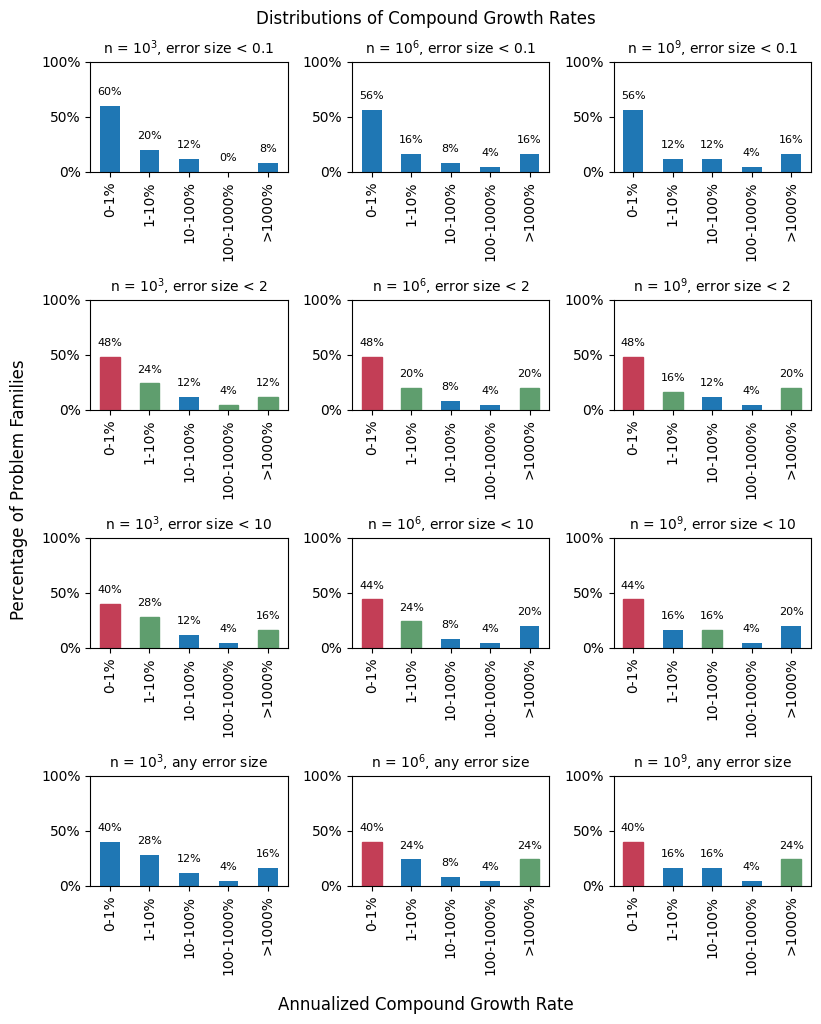

In [12]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]


def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = common_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.1, 1, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-10%', '10-100%', '100-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')

# plot 3 figures
fig, axs = plt.subplots(4, 3, figsize=(8,10))

# 1 - "smaller" than 0.1
cgr_n_3_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 0], title='n = $10^{3}$, error size < 0.1')
cgr_n_6_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 1], title='n = $10^{6}$, error size < 0.1')
cgr_n_9_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 2], title='n = $10^{9}$, error size < 0.1')

# 1 and 2
cgr_n_3_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 0], title='n = $10^{3}$, error size < 2')
cgr_n_6_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 1], title='n = $10^{6}$, error size < 2')
cgr_n_9_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 2], title='n = $10^{9}$, error size < 2')

# 1 and 2 and 2.4
cgr_n_3_e_2_6['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 0], title='n = $10^{3}$, error size < 10')
cgr_n_6_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 1], title='n = $10^{6}$, error size < 10')
cgr_n_9_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 2], title='n = $10^{9}$, error size < 10')

# 1 and 2 and 3 and 4
cgr_n_3_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 0], title='n = $10^{3}$, any error size')
cgr_n_6_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 1], title='n = $10^{6}$, any error size')
cgr_n_9_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 2], title='n = $10^{9}$, any error size')


# y-axis label from 0 to 100%
for ax in axs.flat:
    # font size title
    ax.title.set_size(10)

    ax.set(ylabel='', xlabel='')
    ax.set_ylim(0, 1)
    # format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    # rotate x-axis labels
    ax.tick_params(axis='x', rotation=90)
    


# if the value decreases, set the color to red
for  index,ax in enumerate(axs.flat):
    if index < 3:
        continue
    for pindex, p in enumerate(ax.patches):
        if axs.flat[index-3].patches[pindex].get_height() > p.get_height():
            p.set_color('#C33E56')
        elif axs.flat[index-3].patches[pindex].get_height() < p.get_height():
            p.set_color('#5F9E6E')

# add value on top of each bar
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

fig.suptitle("Distributions of Compound Growth Rates")
fig.text(0.5, -0.02, 'Annualized Compound Growth Rate', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Percentage of Problem Families', va='center', rotation='vertical', fontsize=12)




# add margin between subplots
plt.tight_layout()
plt.show()



n = $10^{3}$, error size ≤ 0.1
n = $10^{6}$, error size ≤ 0.1
n = $10^{9}$, error size ≤ 0.1
n = $10^{3}$, error size ≤ 2
n = $10^{6}$, error size ≤ 2
n = $10^{9}$, error size ≤ 2
n = $10^{3}$, error size ≤ 10
n = $10^{6}$, error size ≤ 10
n = $10^{9}$, error size ≤ 10
n = $10^{3}$, any error size
n = $10^{6}$, any error size
n = $10^{9}$, any error size


/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_92608/2211402042.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


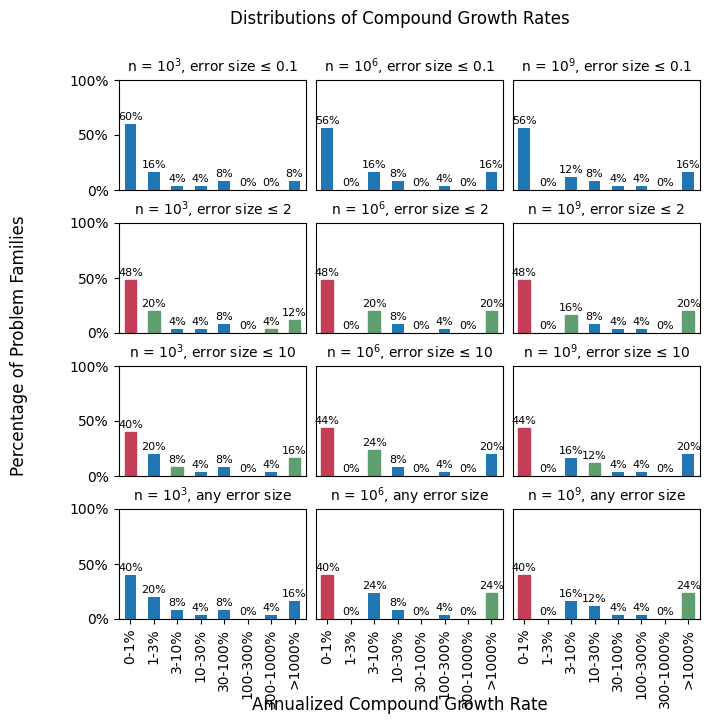

In [13]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]


def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = common_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-3%', '3-10%', '10-30%', '30-100%', '100-300%', '300-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')

# plot 3 figures
fig, axs = plt.subplots(4, 3, figsize=(7.5,7), sharex=True, sharey=True, gridspec_kw={'wspace': 0.05, 'hspace': 0.3})

# 1 - "smaller" than 0.1
cgr_n_3_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 0], title='n = $10^{3}$, error size ≤ 0.1')
cgr_n_6_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 1], title='n = $10^{6}$, error size ≤ 0.1')
cgr_n_9_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 2], title='n = $10^{9}$, error size ≤ 0.1')

# 1 and 2
cgr_n_3_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 0], title='n = $10^{3}$, error size ≤ 2')
cgr_n_6_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 1], title='n = $10^{6}$, error size ≤ 2')
cgr_n_9_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 2], title='n = $10^{9}$, error size ≤ 2')

# 1 and 2 and 2.4
cgr_n_3_e_2_6['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 0], title='n = $10^{3}$, error size ≤ 10')
cgr_n_6_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 1], title='n = $10^{6}$, error size ≤ 10')
cgr_n_9_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 2], title='n = $10^{9}$, error size ≤ 10')

# 1 and 2 and 3 and 4
cgr_n_3_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 0], title='n = $10^{3}$, any error size')
cgr_n_6_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 1], title='n = $10^{6}$, any error size')
cgr_n_9_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3, 2], title='n = $10^{9}$, any error size')




# y-axis label from 0 to 100%
for ax in axs.flat:
    # font size title
    ax.title.set_size(10)

    text = ax.title.get_text()
    if 'any error size' not in text:
        ax.xaxis.set_visible(False)
    if 'n = $10^{3}$' not in text:
        ax.yaxis.set_visible(False)

    print(ax.title.get_text())


    ax.set(ylabel='', xlabel='')
    ax.set_ylim(0, 1)
    # format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    # rotate x-axis labels
    ax.tick_params(axis='x', rotation=90)
    

# for ax in axs:
#     for (a,i) in ax:
#         if i == 0:
#             pass
#         else:
#             ax.yaxis.set_visible(False)

# if the value decreases, set the color to red
for  index,ax in enumerate(axs.flat):
    if index < 3:
        continue
    for pindex, p in enumerate(ax.patches):
        if axs.flat[index-3].patches[pindex].get_height() > p.get_height():
            p.set_color('#C33E56')
        elif axs.flat[index-3].patches[pindex].get_height() < p.get_height():
            p.set_color('#5F9E6E')

# add value on top of each bar
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

fig.suptitle("Distributions of Compound Growth Rates")
fig.text(0.5, -0.02, 'Annualized Compound Growth Rate', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Percentage of Problem Families', va='center', rotation='vertical', fontsize=12)

plt.subplots_adjust(wspace=0)  # Adjust width space between subplots
plt.subplots_adjust(hspace=0.1)


# add margin between subplots
plt.tight_layout()
plt.show()



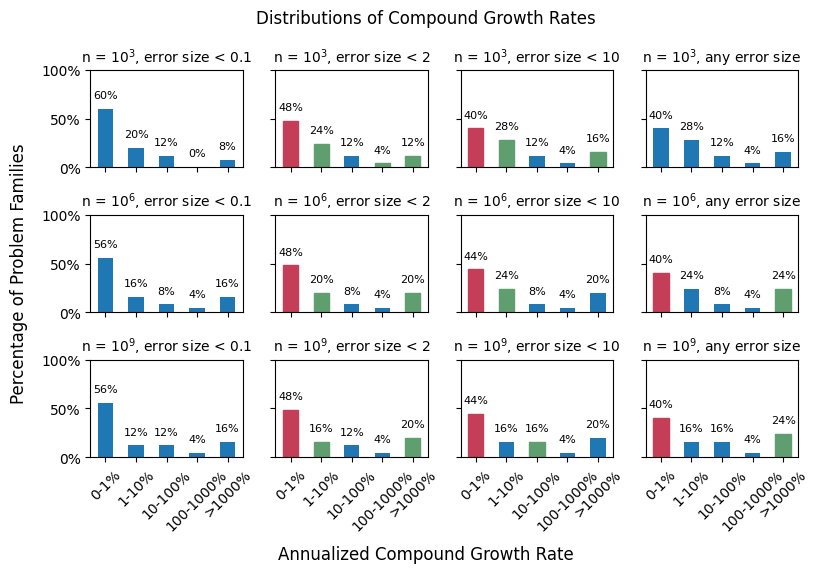

In [14]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]


def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = common_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.1, 1, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-10%', '10-100%', '100-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')

# plot 3 figures
fig, axs = plt.subplots(3, 4, figsize=(8,5.5), sharex=True, sharey=True)

# 1 - "smaller" than 0.1
cgr_n_3_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 0], title='n = $10^{3}$, error size < 0.1')
cgr_n_6_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 0], title='n = $10^{6}$, error size < 0.1')
cgr_n_9_e_1['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 0], title='n = $10^{9}$, error size < 0.1')

# 1 and 2
cgr_n_3_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 1], title='n = $10^{3}$, error size < 2')
cgr_n_6_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 1], title='n = $10^{6}$, error size < 2')
cgr_n_9_e_2['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 1], title='n = $10^{9}$, error size < 2')

# 1 and 2 and 2.4
cgr_n_3_e_2_6['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 2], title='n = $10^{3}$, error size < 10')
cgr_n_6_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 2], title='n = $10^{6}$, error size < 10')
cgr_n_9_e_2_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 2], title='n = $10^{9}$, error size < 10')

# 1 and 2 and 3 and 4
cgr_n_3_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[0, 3], title='n = $10^{3}$, any error size')
cgr_n_6_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1, 3], title='n = $10^{6}$, any error size')
cgr_n_9_e_4['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2, 3], title='n = $10^{9}$, any error size')




# y-axis label from 0 to 100%
for ax in axs.flat:
    # font size title
    ax.title.set_size(10)

    ax.set(ylabel='', xlabel='')
    ax.set_ylim(0, 1)
    # format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    # rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)
    


# if the value decreases, set the color to red
for  index,ax in enumerate(axs.flat):
    if index % 4 == 0:
        continue
    for pindex, p in enumerate(ax.patches):
        if axs.flat[index-1].patches[pindex].get_height() > p.get_height():
            p.set_color('#C33E56')
        elif axs.flat[index-1].patches[pindex].get_height() < p.get_height():
            p.set_color('#5F9E6E')

# add value on top of each bar
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

fig.suptitle("Distributions of Compound Growth Rates")
fig.text(0.5, -0.02, 'Annualized Compound Growth Rate', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Percentage of Problem Families', va='center', rotation='vertical', fontsize=12)




# add margin between subplots
plt.tight_layout()
plt.show()



In [15]:
def add_headers(
    fig,
    *,
    row_headers=None,
    col_headers=None,
    row_pad=1,
    col_pad=5,
    rotate_row_headers=True,
    **text_kwargs
):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_92608/3472741616.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


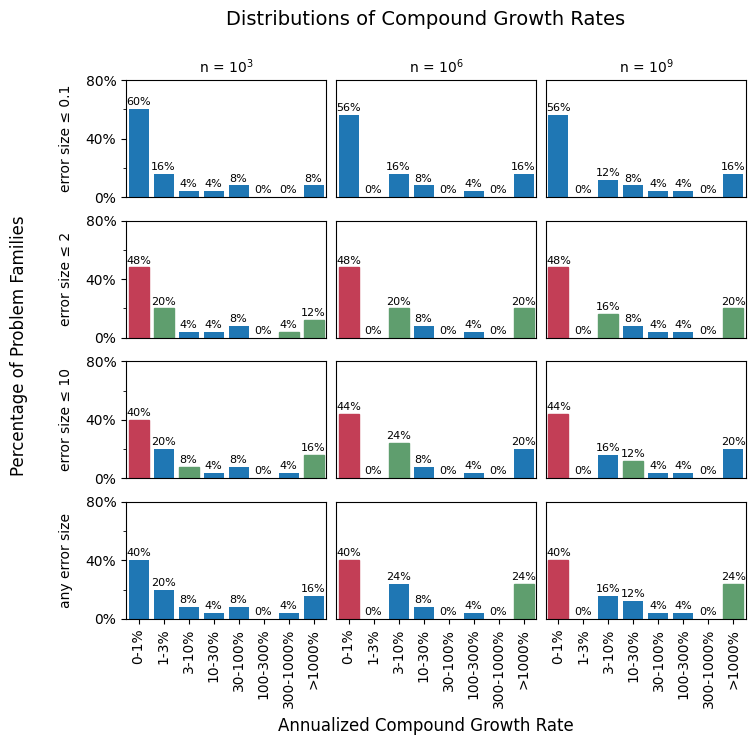

In [16]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]


def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = common_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-3%', '3-10%', '10-30%', '30-100%', '100-300%', '300-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')


cgr_datasets = {
    'cgr_n_3_e_1': cgr_n_3_e_1,
    'cgr_n_6_e_1': cgr_n_6_e_1,
    'cgr_n_9_e_1': cgr_n_9_e_1,
    'cgr_n_3_e_2': cgr_n_3_e_2,
    'cgr_n_6_e_2': cgr_n_6_e_2,
    'cgr_n_9_e_2': cgr_n_9_e_2,
    'cgr_n_3_e_2_6': cgr_n_3_e_2_6,
    'cgr_n_6_e_2_4': cgr_n_6_e_2_4,
    'cgr_n_9_e_2_4': cgr_n_9_e_2_4,
    'cgr_n_3_e_4': cgr_n_3_e_4,
    'cgr_n_6_e_4': cgr_n_6_e_4,
    'cgr_n_9_e_4': cgr_n_9_e_4
}

# Create the mosaic plot
mosaic = [
    ["cgr_n_3_e_1", "cgr_n_6_e_1", "cgr_n_9_e_1"],
    ["cgr_n_3_e_2", "cgr_n_6_e_2", "cgr_n_9_e_2"],
    ["cgr_n_3_e_2_6", "cgr_n_6_e_2_4", "cgr_n_9_e_2_4"],
    ["cgr_n_3_e_4", "cgr_n_6_e_4", "cgr_n_9_e_4"]
]

row_headers = ["error size ≤ 0.1", "error size ≤ 2", "error size ≤ 10", "any error size"]
col_headers = ["n = $10^{3}$", "n = $10^{6}$", "n = $10^{9}$"]

fig, axs = plt.subplot_mosaic(mosaic, figsize=(8, 7), sharex=True, sharey=True, gridspec_kw={"wspace": 0.05, "hspace": 0.2})

def add_headers(fig, *, row_headers=None, col_headers=None, row_pad=1, col_pad=5, rotate_row_headers=True, **text_kwargs):
    axes = fig.get_axes()
    for ax in axes:
        sbs = ax.get_subplotspec()

        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

for key, ax in axs.items():
    error_size, n = key.split('_')[1], key.split('_')[3]
    cgr_data = cgr_datasets[key]
    cgr_data['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=ax)

add_headers(fig, col_headers=col_headers, row_headers=row_headers, fontweight="regular", fontsize="10")

for ax in axs.values():
    for patch in ax.patches:
        current_width = patch.get_width()
        new_width = current_width + 0.3  # Increase the width by 0.3 (adjust as needed)
        patch.set_width(new_width)
        
        # Adjust the x-position to center the bar
        patch.set_x(patch.get_x() - (new_width - current_width) / 2)



nrows = 4  # Example: number of rows in your subplot grid
ncols = 3  # Example: number of columns in your subplot grid

for i, (key, ax) in enumerate(axs.items()):
    ax.set(ylabel='', xlabel='')
    ax.set_ylim(0, 0.8)
    ax.set_yticks([0, 0.4, 0.8])
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    ax.tick_params(axis='x', rotation=90)
    
    # Calculate row and column index
    row_index = i // ncols
    col_index = i % ncols

    # Hide x-axis if it's not the last row
    if row_index != nrows - 1:
        ax.xaxis.set_visible(False)
    
    # Hide y-axis if it's not the first column
    if col_index != 0:
        ax.yaxis.set_visible(False)

axs_list = list(axs.values())
for index, ax in enumerate(axs_list):
    
    if index < 3:
        continue
    for pindex, p in enumerate(ax.patches):
        if axs_list[index-3].patches[pindex].get_height() > p.get_height():
            p.set_color('#C33E56')
        elif axs_list[index-3].patches[pindex].get_height() < p.get_height():
            p.set_color('#5F9E6E')

for ax in axs.values():
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x()+.0 + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

fig.suptitle("Distributions of Compound Growth Rates", fontsize=14)
fig.text(0.5, -0.05, 'Annualized Compound Growth Rate', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Percentage of Problem Families', va='center', rotation='vertical', fontsize=12)

plt.tight_layout()

plt.savefig('figures/time-only-approximation-families.png', bbox_inches='tight')
plt.savefig('figures/figure 4.png', bbox_inches='tight')

plt.show()

# New Graph



In [17]:
# APSP
# TRaveling salesman problem
# Set cover problems 


# For each family have 3 lines (Any, Constant, Exact)

# log scale
# log log scale


In [18]:
import pandas as pd

# Assuming APSP_exact, APSP_constant_factor, and APSP_any_error are already defined

def filter_lowest_values(df):
    df.sort_values(by=['Year'], inplace=True)
    filtered_rows = []
    last_value = float('inf')
    
    for _, row in df.iterrows():
        if row['n = 10^9'] <= last_value:
            filtered_rows.append(row)
            last_value = row['n = 10^9']
    
    return pd.DataFrame(filtered_rows)

APSP_exact = sheet1[sheet1['Family Name'] == 'The Traveling-Salesman Problem']
APSP_constant_factor = approximation_algorithms[approximation_algorithms['Family Name'] == 'The Traveling-Salesman Problem']

# Filter APSP_constant_factor with correct conditions
APSP_constant_factor = APSP_constant_factor[
    (APSP_constant_factor['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
    (APSP_constant_factor['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
]

APSP_any_error = approximation_algorithms[approximation_algorithms['Family Name'] == 'The Traveling-Salesman Problem']

print(len(APSP_exact))
print(len(APSP_constant_factor))
print(len(APSP_any_error))

# Keep only specified columns
columns_to_keep = ['Family Name', 'Algorithm Name', 'Year', 'n = 10^9']
APSP_exact = APSP_exact[columns_to_keep]
APSP_constant_factor = APSP_constant_factor[columns_to_keep]
APSP_any_error = APSP_any_error[columns_to_keep]

# Concatenate exact into constant factor and any error
APSP_constant_factor = pd.concat([APSP_constant_factor, APSP_exact], ignore_index=True)
APSP_any_error = pd.concat([APSP_any_error, APSP_exact], ignore_index=True)

# Filter each DataFrame to keep only the lowest values for n = 10^9 until each year
APSP_exact_filtered = filter_lowest_values(APSP_exact)
APSP_constant_factor_filtered = filter_lowest_values(APSP_constant_factor)
APSP_any_error_filtered = filter_lowest_values(APSP_any_error)

# Print the filtered DataFrames
(APSP_constant_factor_filtered)
# New Graph

3
17
20


,Family Name,Algorithm Name,Year,n = 10^9
18,The Traveling-Salesman Problem,Dantzig-Fulkerson-Johnson (DFJ) formulation,1954.0,2^1000000000
17,The Traveling-Salesman Problem,Miller-Tucker-Zemlin (MTZ) formulation,1960.0,2^1000000000
0,The Traveling-Salesman Problem,Nicholson,1967.0,29897352853986263040.0
5,The Traveling-Salesman Problem,Approximation using Euclidean MST,1974.0,29897352853.986263
6,The Traveling-Salesman Problem,Karp [Algorithm 1],1977.0,29897352853.986263
7,The Traveling-Salesman Problem,Karp [Algorithm 2],1977.0,29897352853.986263
12,The Traveling-Salesman Problem,"Rao, Smith [Monte Carlo Algorithm]",1998.0,29897352853.986263
13,The Traveling-Salesman Problem,"Rao, Smith [Las Vegas Algorithm]",1998.0,29897352853.986263
14,The Traveling-Salesman Problem,"Rao, Smith [Derandomized Algorithm]",1998.0,29897352853.986263
15,The Traveling-Salesman Problem,"Bartal, Gottlieb",2013.0,1000000000


In [19]:
filter_lowest_values(sheet1[sheet1['Family Name'] == 'All-Pairs Shortest Paths (APSP)'])

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_92608/4093881233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Year'], inplace=True)


,Family Name,Looked at?,Variation,Algorithm Name,Year,Time Complexity Class,Time Encoding,Approximate?,Parallel?,Quantum?,"Approx Error ""Size"" (for figures only)",Time Encoding Function,n = 10^3,n = 10^6,n = 10^9
270,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Directed Graphs with Arbitrary W...,Shimbel Algorithm,1953.0,7.000,40,0.0,0,0.0,0,comp_fn_40_0000,1.000000e+12,1000000000000000000000000,1000000000000000000000000000000000000
271,All-Pairs Shortest Paths (APSP),2.0,APSP,Floyd–Warshall algorithm,1962.0,6.000,30,0.0,0,0.0,0,comp_fn_30_0000,1.000000e+09,1000000000000000000,1000000000000000000000000000
272,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Undirected Unweighted Graphs; AP...,Seidel's algorithm,1995.0,5.373,26.1,0.0,0,0.0,0,comp_fn_26_1000,1.310725e+08,3447795337603460.0,68019390664990485643264.0
275,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Undirected Graphs with Positive ...,Thorup,1999.0,6.000,20,0.0,0,0.0,0,comp_fn_20_0000,1.000000e+06,1000000000000,1000000000000000000
